In [160]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra
from scipy.io import wavfile
from scipy.io import savemat
from scipy.signal import correlate
import IPython
import heapq

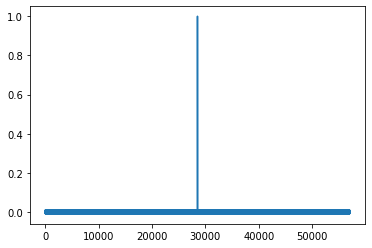

(57040,)


In [161]:
#uni_white_noise = np.random.uniform(-1,1,57040)
uni_white_noise = np.random.uniform(-0.01,0.01,57040)
uni_white_noise[28518] = 0.33
uni_white_noise[28519] = 0.67
uni_white_noise[28520] = 1
uni_white_noise[28521] = 0.67
uni_white_noise[28522] = 0.33

plt.plot(uni_white_noise)
plt.show()
print(uni_white_noise.shape)

In [162]:
def get_rir(size='medium', absorption='medium', order = 0):
    if absorption=='high':
        absor = 0.9
    elif absorption=='medium':
        absor = 0.3
    elif absorption=='low':
        absor = 0.1
    else:
        raise ValueError("The absorption parameter can only take values ['low', 'medium', 'high']")
    
    if size=='large':
        size_coef = 5.
    elif size=='medium':
        size_coef = 2.5
    elif size=='small':
        size_coef = 1.
    else:
        raise ValueError("The size parameter can only take values ['small', 'medium', 'large']")
        
        
    pol = size_coef * np.array([[0,0], [0,6], [5,6], [5,0]]).T
    room = pra.Room.from_corners(pol, fs=16000, max_order=order, absorption=absor)

    # Create the 3D room by extruding the 2D by a specific height
    room.extrude(size_coef * 2.5, absorption=absor)

    # Adding the source
    room.add_source(size_coef * np.array([1.8, 0.4, 1.6]), signal=uni_white_noise)

    # Adding the microphone
    R = size_coef * np.array([[2.5,2.9,0.5], 
                              [2.0, 2.0, 0.8], 
                              [1.5, 1.5, 1.0], 
                              [1.0, 0.5, 0.6], 
                              [2.5, 0.5, 1.0],
                              [2.9, 1.0, 1.2],
                              [0.5, 1.5, 1.0],
                              [0.8, 3.5, 1.5],
                              [2.9, 2.5, 1.0],
                              [2.0, 3.9, 1.6]])
    R = np.transpose(R)
    room.add_microphone_array(pra.MicrophoneArray(R, room.fs))

    # Compute the RIR
    room.compute_rir()

    # Plot and apply the RIR on the audio file
    #room.plot_rir()
    #plt.show()
    room.simulate()
    room.mic_array.to_wav('aaa.wav', norm=True, bitdepth=np.int16)
    
    # Display the audio file
    fs_result, result = wavfile.read('aaa.wav')
    #IPython.display.display(IPython.display.Audio(result, rate=fs_result))
    
    return room.rir

(10, 1)


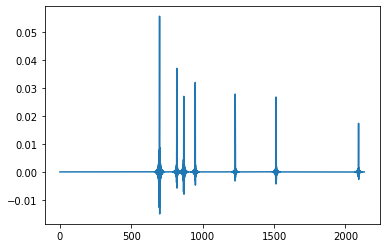

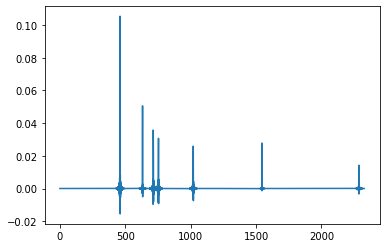

In [163]:
rir_small = get_rir(size='large', absorption='low', order = 1)

rir_small = np.array(rir_small)
print(rir_small.shape)

plt.plot(rir_small[0][0])
plt.show()

plt.plot(rir_small[1][0])
plt.show()

In [164]:
rir_done = []

for i in range(10):
    for row in rir_small[i]:
        rir_done.append(row)
        print(len(row))

2133
2329
2442
2688
2679
2569
2461
1985
2224
1878


In [165]:
out = []

for i in range(10):
    o = np.convolve(uni_white_noise, rir_done[i])
    out.append(o)

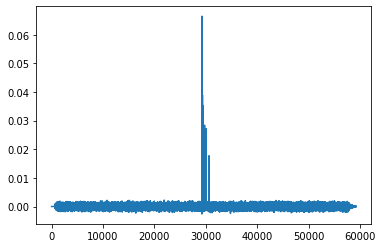

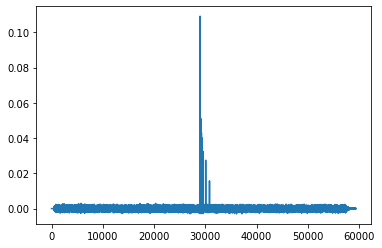

In [166]:
plt.plot(out[0])
plt.show()

plt.plot(out[1])
plt.show()

59172
59368


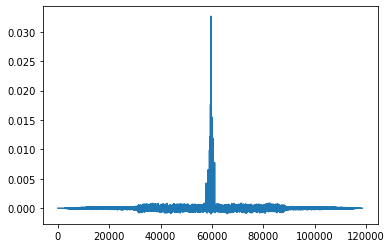

In [167]:
print(len(out[0]))
print(len(out[1]))
ans = correlate(out[0],out[1],"full")
ans2 = correlate(out[1], out[0], "full")

plt.plot(ans)
plt.show()

In [168]:
print(heapq.nlargest(1,range(len(ans)),ans.take))
print(heapq.nlargest(1,range(len(ans2)), ans2.take))

[59605]
[58933]


In [169]:
tij = np.zeros((10,10))
cnt = 0

for i in range(10):
    for j in range(10):
        print(cnt)
        cnt = cnt + 1
        if(i == j):
            continue
        else:
            ans = np.correlate(out[i],out[j],"full")
            val = heapq.nlargest(1,range(len(ans)),ans.take)
            tij[i][j] = val[0]/16000
            
print(abs(tij))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[[0.        3.7253125 3.7398125 3.75525   3.759875  3.747375  3.7335
  3.6825625 3.7093125 3.67225  ]
 [3.6833125 0.        3.7249375 3.740375  3.7450625 3.7325    3.718625
  3.6676875 3.6944375 3.657375 ]
 [3.675875  3.703     0.        3.7329375 3.7375625 3.7250625 3.711125
  3.6601875 3.687     3.6499375]
 [3.6758125 3.7029375 3.7174375 0.        3.7375    3.725     3.7110625
  3.6601875 3.6869375 3.649875 ]
 [3.670625  3.6976875 3.71225   3.7276875 0.        3.7198125 3.705875
  3.6549375 3.68175   3.6446875]
 [3.67625   3.703375  3.717875  3.7333125 3.7379375 0.        3.7115625
  3.660625  3.687375  3.6503125]
 [3.683375  3.7105    3.7250625 3.7405    3.745125  3.7325625 0.
  3.66775   3.6945625